## Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

## The Moore Penrose Pseudoinverse

[Understanding moore pseudoinverse](https://www.section.io/engineering-education/moore-penrose-pseudoinverse/)

[Linear Systems of Equations, Least Squares Regression, Pseudoinverse](https://www.youtube.com/watch?v=PjeOmOz9jSY&ab_channel=SteveBrunton)

### Find SVD for the matrix A then find it's Pseeudoinverse:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [2]:
A = np.array([[7,2],
              [3,4],
              [5,3]])

In [3]:
U,d,V = np.linalg.svd(A)

In [4]:
def D_plus(d):
    D = np.diag(d)
    D_inv = np.linalg.inv(D)
    D_plus = np.hstack((D_inv,np.zeros((D.shape[0],1))))
    return D_plus

In [5]:
A_plus  = V.T @ D_plus(d) @ U.T
A_plus

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Use np.linalg.pinv(A) and compare the res

In [6]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Multiply A+ and  A. See if the result is close to the Identity matrix

In [7]:
A_plus@A

array([[1.00000000e+00, 2.63677968e-16],
       [5.55111512e-17, 1.00000000e+00]])

### Multiply A and A+. Notice the result
- A difference with the real inverse is that A+A is approximate I. However AA+ is not`

In [8]:
A@A_plus

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

### Using the pseudoinverse to solve a overdetermined system of linear equations
- In general there is no solution to overdetermined systems.
- In the following picture, there is no point at the intersection of the three lines corresponding to three equations:

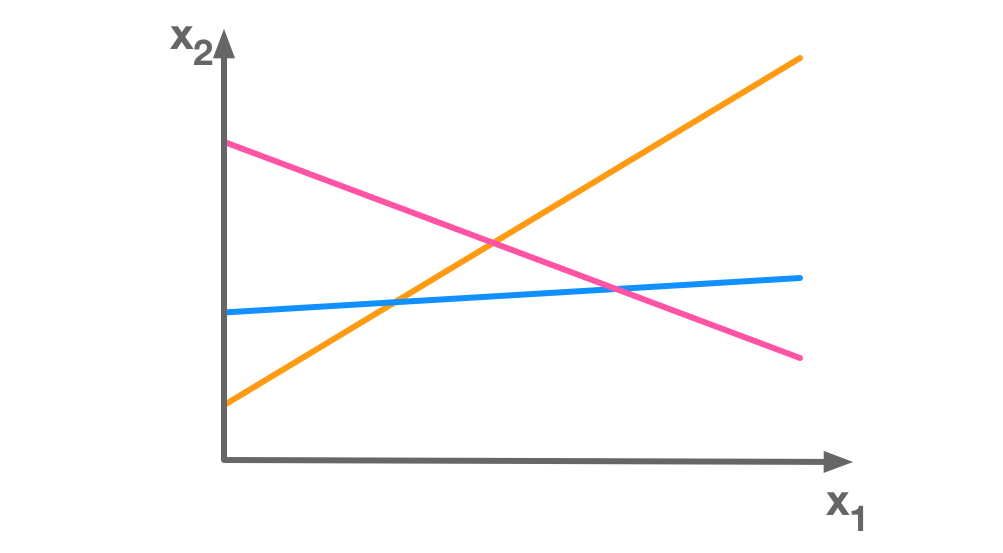

### Use pseudoinverse to find the approximate solution of the following system of linear equations:
#### -2x1 - x2 = -2 , 4x1 - x2 = -8 , -x1 - x2 =-2

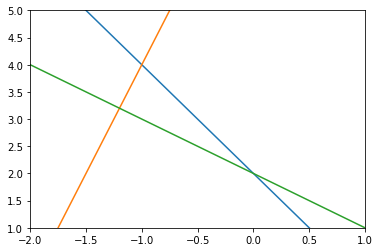

In [9]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [10]:
A = np.array([[-2,-1],
              [4,-1],
              [-1,-1]])
b = np.array([[-2,-8,-2]]).T

In [11]:
U,d,V = np.linalg.svd(A)
A_plus = V.T @ D_plus(d) @ U.T

In [12]:
A_plus 

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [13]:
res = A_plus @ b
res

array([[-1.06451613],
       [ 3.64516129]])

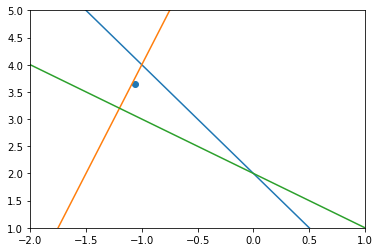

In [14]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()